In [1]:
setwd('/import/jliu/data2/')

In [2]:
load('combat_edata_matrix4.rda')

In [3]:
head(combat_edata1,2)

head(anno,2)

,M1_CI10,M1_CI11,M1_CI12,M1_CI13,M1_CI14,M1_CI15,M1_CI16,M1_CI17,M1_CI18,M1_CI19,...,M2_CI16,M2_CI1,M2_CI2,M2_CI3,M2_CI4,M2_CI5,M2_CI6,M2_CI7,M2_CI8,M2_CI9
A1BG,3.691861e-01,3.363656e-01,3.248464e-01,1.498590e-01,2.705496e-01,2.863775e-01,2.115415e-01,2.488806e-01,1.905475e-01,1.999415e-01,...,2.469522e-01,2.207960e-01,2.140439e-01,1.658694e-01,5.217256e-01,2.921764e-01,2.660756e-01,2.379583e-01,1.019148e-01,1.412708e-01
A1CF,2.562889e-05,2.562889e-05,2.562889e-05,2.562889e-05,2.562889e-05,2.562889e-05,2.562889e-05,2.562889e-05,2.562889e-05,2.562889e-05,...,-5.967964e-05,-5.967964e-05,-5.967964e-05,-5.967964e-05,-5.967964e-05,-5.967964e-05,-5.967964e-05,-5.967964e-05,-5.967964e-05,-5.967964e-05


,group,Matrix
,<chr>,<chr>
M1_CI10,CI,Matrix1
M1_CI11,CI,Matrix1


In [4]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
CI   = anno %>%  dplyr::filter(group == 'CI') %>%  rownames()

In [6]:
exp =  combat_edata1[c('FAM200B','BCL2A1','IGJ','TXN'),CI]   

In [7]:
library(ConsensusClusterPlus)

Warning message:
"package 'ConsensusClusterPlus' was built under R version 4.2.2"


In [8]:
library(NMF) 

con <- ConsensusClusterPlus(exp, #矩阵形式
                            maxK=10, #最大聚类簇数量
                            reps=100, #抽取的子样本数量
                            pItem=0.8,#抽样样本的比例 
                            pFeature=1,
                            title="resultstrain3", #输出文件夹名字
                            clusterAlg="km", #选择聚类算法
                            distance="euclidean", #指定聚类时使用的距离或相关性类型
                            seed=1234, #中子数
                            plot="png", #输出格式 （pdf可能会比较难打开）
                            writeTable=TRUE)

Loading required package: registry

Warning message:
"package 'registry' was built under R version 4.2.3"
Loading required package: rngtools

Warning message:
"package 'rngtools' was built under R version 4.2.3"
Loading required package: cluster

Warning message:
"package 'cluster' was built under R version 4.2.3"
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')

end fraction

clustered

clustered

clustered

clustered

clustered

clustered

clustered

clustered

clustered



In [52]:
# dim(expr)

# expr1 = log2(expr+1)

# nmfinput = as.data.frame(expr1)

# library(NMF)

# ranks <- 1:10
# estim.coad <- nmf(nmfinput,ranks, nrun=20)
# duplicated(colnames(nmfinput))



# plot(estim.coad)

# seed = 2020820
# nmf.rank4 <- nmf(nmfinput, 
#                  rank = 2, 
#                  nrun=50,
#                  seed = seed, 
#                  method = "brunet")

# jco <- c("#EABF00","#C6524A","#868686")
# index <- extractFeatures(nmf.rank4,"max") 
# sig.order <- unlist(index)
# NMF.Exp.rank4 <- nmfinput[sig.order,]
# NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
# group <- predict(nmf.rank4) # 提出亚型
# table(group)
# consensusmap(nmf.rank4,
#              labRow = NA,
#              labCol = NA,
#              annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
#              annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

# library(tinyarray)

# dim(nmfinput)

In [10]:
group1 = read.csv('./resultstrain3/resultstrain3.k=2.consensusClass.csv',header =F)

### group1 和group2的差异分析

In [11]:
expr = combat_edata1 %>% as.data.frame()

In [12]:
n=expr[,group1$V1]

In [13]:
group = paste0('subtype',group1$V2)

In [14]:
group_list <- factor(group,levels = c("subtype1","subtype2"),ordered = F)

Warning message:
"package 'limma' was built under R version 4.2.3"

Attaching package: 'limma'


The following object is masked from 'package:BiocGenerics':

    plotMA




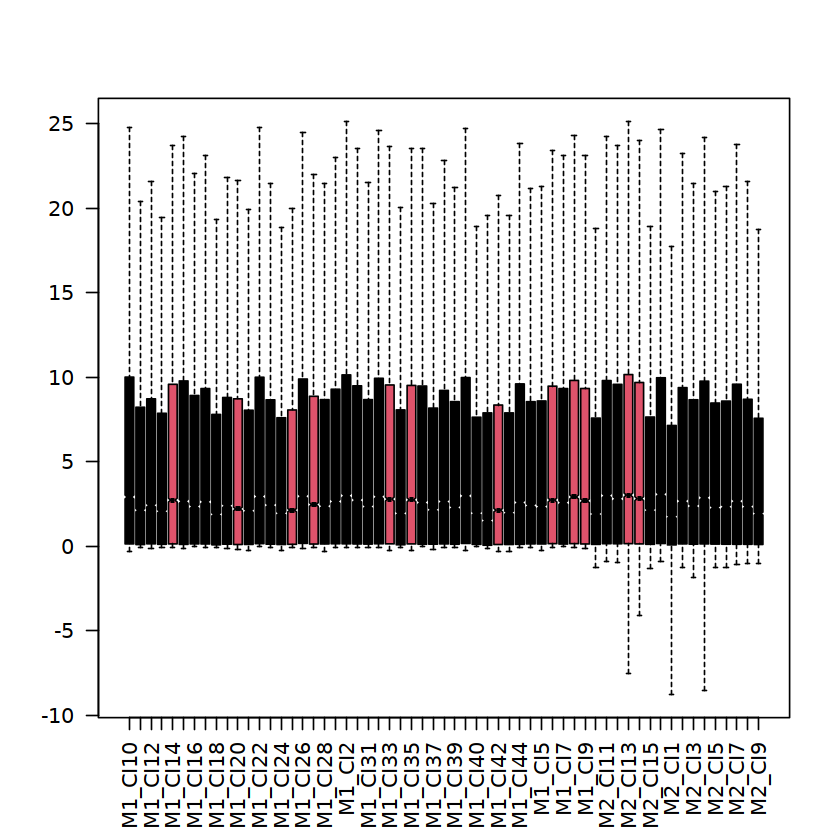

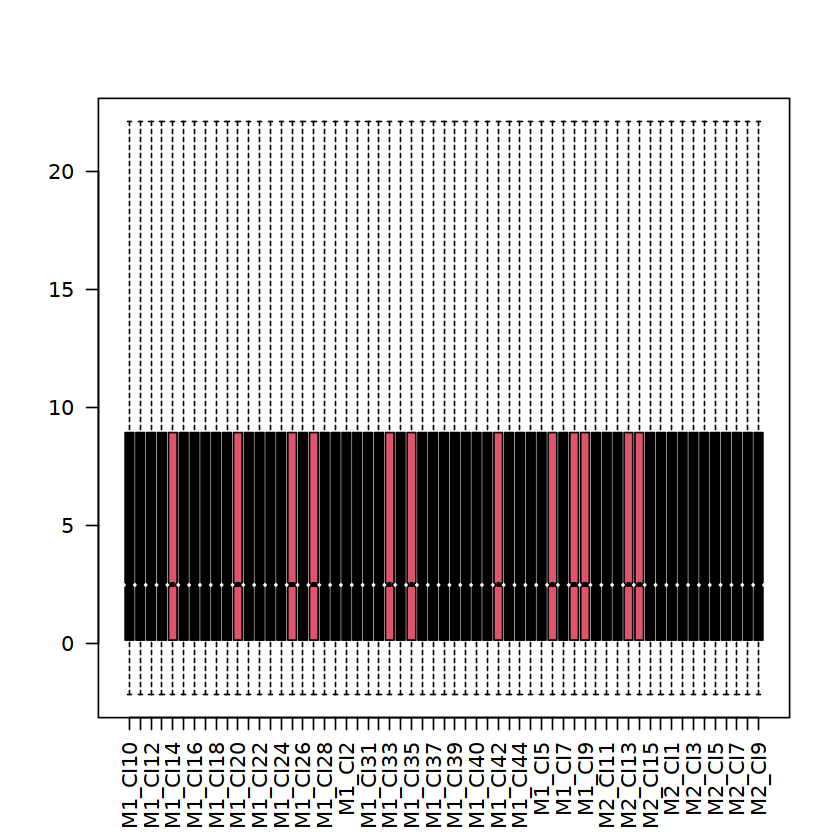

In [15]:
exprSet <- n
boxplot(exprSet,outline=FALSE, notch=T,col=group_list, las=2)
library(limma) 
exprSet=normalizeBetweenArrays(exprSet)
boxplot(exprSet,outline=FALSE, notch=T,col=group_list, las=2)

In [16]:
dat <- exprSet
design=model.matrix(~factor( group ))
fit=lmFit(dat,design)
fit=eBayes(fit)
options(digits = 4)
topTable(fit,coef=2,adjust='BH')
bp=function(g){
  library(ggpubr)
  df=data.frame(gene=g,stage=group)
  p <- ggboxplot(df, x = "stage", y = "gene",
                 color = "stage", palette = "jco",
                 add = "jitter")
  #  Add p-value
  p + stat_compare_means()
}
deg=topTable(fit,coef=2,adjust='BH',number = Inf)
head(deg) 

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IGJ,112.35757,67.88726,10.845,1.586e-15,2.765e-11,21.167
GPRC5D,0.83779,0.60227,6.667,1.101e-08,9.595e-05,8.749
TNFRSF17,0.99006,0.65271,6.460,2.438e-08,1.417e-04,8.091
GLDC,0.33204,0.23055,6.375,3.374e-08,1.471e-04,7.822
IGF1,0.09098,0.04678,5.748,3.628e-07,1.265e-03,5.844
TXNDC5,0.29707,0.52512,5.556,7.420e-07,2.156e-03,5.246
HRASLS2,0.88435,0.45410,5.487,9.605e-07,2.392e-03,5.030
EYA2,0.08848,0.06101,5.044,4.879e-06,1.063e-02,3.665
MZB1,5.62533,5.91835,4.928,7.395e-06,1.432e-02,3.316


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IGJ,112.35757,67.88726,10.845,1.586e-15,2.765e-11,21.167
GPRC5D,0.83779,0.60227,6.667,1.101e-08,9.595e-05,8.749
TNFRSF17,0.99006,0.65271,6.460,2.438e-08,1.417e-04,8.091
GLDC,0.33204,0.23055,6.375,3.374e-08,1.471e-04,7.822
IGF1,0.09098,0.04678,5.748,3.628e-07,1.265e-03,5.844
TXNDC5,0.29707,0.52512,5.556,7.420e-07,2.156e-03,5.246


In [17]:
deg[c('FAM200B','BCL2A1','IGJ','TXN'),]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM200B,0.1113,7.032,0.1796,8.581e-01,9.982e-01,-5.708
BCL2A1,10.5818,46.790,1.1021,2.750e-01,9.965e-01,-5.176
IGJ,112.3576,67.887,10.8454,1.586e-15,2.765e-11,21.167
TXN,1.8101,21.575,0.6236,5.354e-01,9.965e-01,-5.547


In [18]:
padj = 0.05
foldChange = 0.5

deg$group = as.factor(ifelse(deg$P.Value < padj & abs(deg$logFC	) > foldChange, 
                                 ifelse(deg$logFC	> foldChange ,'Up','Down'),'NoSignifi'))
table(deg$group)


     Down NoSignifi        Up 
      137     17131       166 

In [19]:
cg = deg %>% dplyr::filter(group != 'NoSignifi') %>%  rownames()
n=exprSet[cg,group1$V1]
group3 = group1$V2
names(group3) = group1$V1
group4 = as.factor(group3)
library(tinyarray)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree




Attaching package: 'tinyarray'


The following object is masked _by_ '.GlobalEnv':

    deg


The following ob

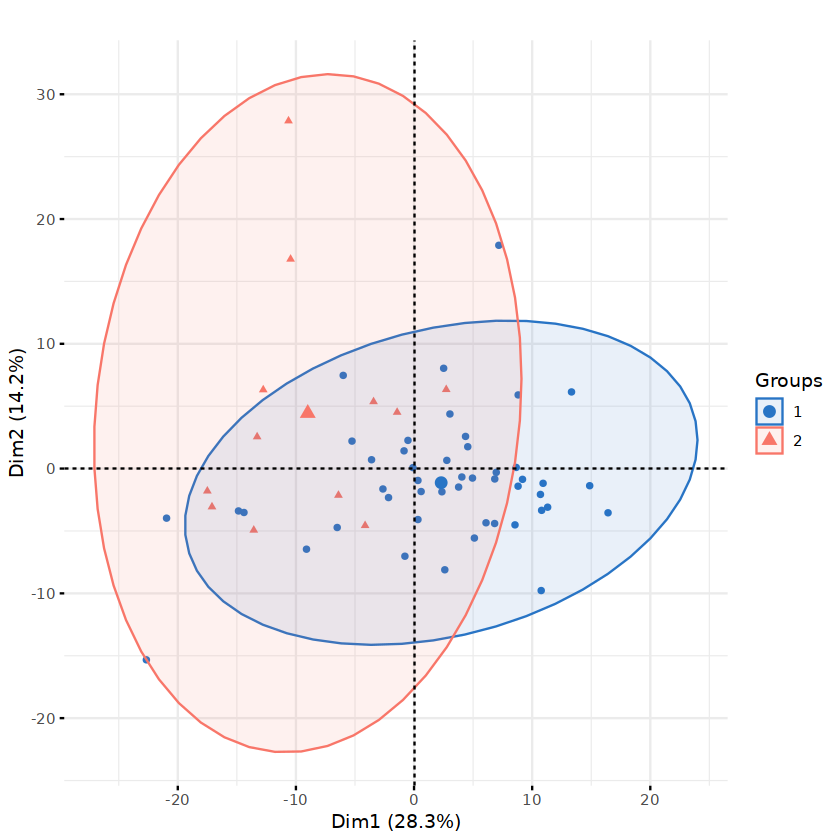

In [20]:
draw_pca(n,group4)

### 差异基因表达热图  这里是subtype2 与subtype1比

In [21]:
data1 = n

In [22]:
library(pheatmap)
forplot = na.omit(data1)
#forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

Warning message:
"package 'pheatmap' was built under R version 4.2.3"


[1] 303  59

In [23]:
library(pheatmap)
annotation_col = data.frame(group)
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

,M1_CI10,M1_CI11,M1_CI12,M1_CI13,M1_CI14,M1_CI15,M1_CI16,M1_CI17,M1_CI18,M1_CI19,...,M2_CI16,M2_CI1,M2_CI2,M2_CI3,M2_CI4,M2_CI5,M2_CI6,M2_CI7,M2_CI8,M2_CI9
IGJ,-0.01391,-0.2835,-0.2266,-1.0278,0.7635,0.9153,-0.3760,-0.9386,-0.471933,-0.1650,...,-0.6412,-0.9725,0.0188,-0.4101,0.03706,-0.8362,0.4315,-0.08605,-0.9515,-0.28561
GPRC5D,-0.89432,-0.6094,-0.4180,-0.9506,-0.2317,0.1262,-0.2554,-0.9826,-0.006423,-0.2436,...,-1.1533,-0.6369,0.3185,-0.5429,-0.24541,-0.8876,1.2027,-0.54811,-1.0416,0.09056


In [24]:
options(repr.plot.width = 6,repr.plot.height = 5)

In [92]:
#dat = dat[c('FAM200B','BCL2A1','IGJ','TXN'),]

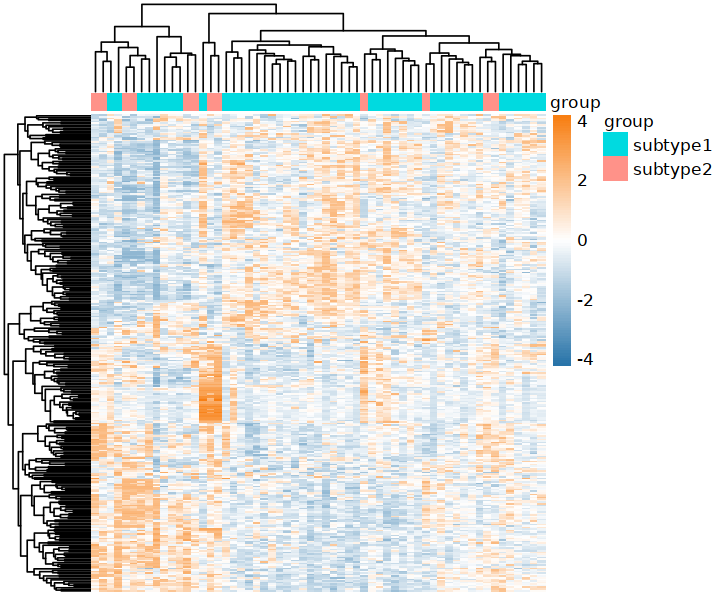

In [25]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="row",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [26]:
table(deg$group)


     Down NoSignifi        Up 
      137     17131       166 

In [27]:
deg$symbol=rownames(deg)
  library(ggplot2)
  library(clusterProfiler)
  library(org.Hs.eg.db)
  df <- bitr(unique(deg$symbol), fromType = "SYMBOL",
             toType = c( "ENTREZID"),
             OrgDb = org.Hs.eg.db)
  head(df)
  DEG=deg
  head(DEG)

  DEG=merge(DEG,df,by.y='SYMBOL',by.x='symbol')
  head(DEG)

  save(DEG,file = 'anno_DEG.Rdata')
  gene_up= DEG[DEG$group == 'Up','ENTREZID'] 
  gene_down=DEG[DEG$group == 'Down','ENTREZID'] 
gene_all= DEG[DEG$group == 'NoSignifi','ENTREZID'] 

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: 'clusterProfiler'


The following object is masked from 'package:stats':

    filter


Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: IRanges

Warning message:
"package 'IRanges' was built under R version 4.2.3"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.3"

Attaching package: 'S4Vectors'


The following object is masked from 'package:clusterProfiler

,SYMBOL,ENTREZID
,<chr>,<chr>
2,GPRC5D,55507
3,TNFRSF17,608
4,GLDC,2731
5,IGF1,3479
6,TXNDC5,81567
8,EYA2,2139


,logFC,AveExpr,t,P.Value,adj.P.Val,B,group,symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
IGJ,112.35757,67.88726,10.845,1.586e-15,2.765e-11,21.167,Up,IGJ
GPRC5D,0.83779,0.60227,6.667,1.101e-08,9.595e-05,8.749,Up,GPRC5D
TNFRSF17,0.99006,0.65271,6.460,2.438e-08,1.417e-04,8.091,Up,TNFRSF17
GLDC,0.33204,0.23055,6.375,3.374e-08,1.471e-04,7.822,NoSignifi,GLDC
IGF1,0.09098,0.04678,5.748,3.628e-07,1.265e-03,5.844,NoSignifi,IGF1
TXNDC5,0.29707,0.52512,5.556,7.420e-07,2.156e-03,5.246,NoSignifi,TXNDC5


,symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B,group,ENTREZID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,A1BG,-0.0062918,2.291e-01,-0.24729,0.8056,0.9982,-5.695,NoSignifi,1
2,A1CF,-0.0001532,6.704e-05,-0.04919,0.9609,0.9982,-5.722,NoSignifi,29974
3,A2M,0.0242905,1.004e-01,1.14917,0.2552,0.9965,-5.129,NoSignifi,2
4,A2ML1,0.0046793,1.719e-03,1.29817,0.1994,0.9965,-4.968,NoSignifi,144568
5,A3GALT2,-0.1024601,1.159e+00,-0.44610,0.6572,0.9965,-5.633,NoSignifi,127550
6,A4GALT,-0.0842794,9.460e-02,-1.05334,0.2966,0.9965,-5.223,NoSignifi,53947


In [28]:
enrichKK <- enrichKEGG(gene         =  gene_all,
                     organism     = 'hsa',
                     #universe     = gene_all,
                     pvalueCutoff = 0.5,
                     qvalueCutoff =0.5)
head(enrichKK)[,1:6] 
enrichKK=DOSE::setReadable(enrichKK, OrgDb='org.Hs.eg.db',keyType='ENTREZID')
enrichKK 

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
hsa05132,hsa05132,Salmonella infection,234/7032,251/8844,9.006e-10,3.071e-07
hsa05166,hsa05166,Human T-cell leukemia virus 1 infection,208/7032,223/8844,7.128e-09,1.215e-06
hsa04071,hsa04071,Sphingolipid signaling pathway,117/7032,122/8844,1.732e-07,1.521e-05
hsa04144,hsa04144,Endocytosis,230/7032,252/8844,2.392e-07,1.521e-05
hsa05165,hsa05165,Human papillomavirus infection,299/7032,333/8844,2.593e-07,1.521e-05
hsa05225,hsa05225,Hepatocellular carcinoma,159/7032,170/8844,2.677e-07,1.521e-05


#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:15490] "1" "29974" "2" "144568" "127550" "53947" "51146" "8086" ...
#...pvalues adjusted by 'BH' with cutoff <0.5 
#...271 enriched terms found
'data.frame':	271 obs. of  9 variables:
 $ ID         : chr  "hsa05132" "hsa05166" "hsa04071" "hsa04144" ...
 $ Description: chr  "Salmonella infection" "Human T-cell leukemia virus 1 infection" "Sphingolipid signaling pathway" "Endocytosis" ...
 $ GeneRatio  : chr  "234/7032" "208/7032" "117/7032" "230/7032" ...
 $ BgRatio    : chr  "251/8844" "223/8844" "122/8844" "252/8844" ...
 $ pvalue     : num  9.01e-10 7.13e-09 1.73e-07 2.39e-07 2.59e-07 ...
 $ p.adjust   : num  3.07e-07 1.22e-06 1.52e-05 1.52e-05 1.52e-05 ...
 $ qvalue     : num  1.50e-07 5.93e-07 7.42e-06 7.42e-06 7.42e-06 ...
 $ geneID     : chr  "ABI1/ACBD3/ACTB/ACTG1/ACTR10/ACTR1A/ACTR1B/ACTR2/ACTR3/ACTR3B/ACTR3C/AHNAK/AHNAK2/AKT1/AKT2/AKT3/ANXA2/ARF1/ARF"| __trunca

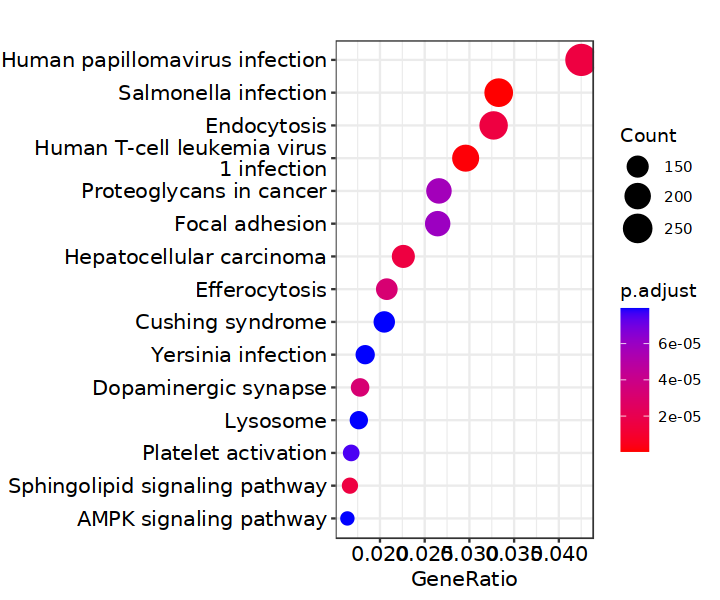

In [29]:
dotplot(enrichKK,showCategory=15)

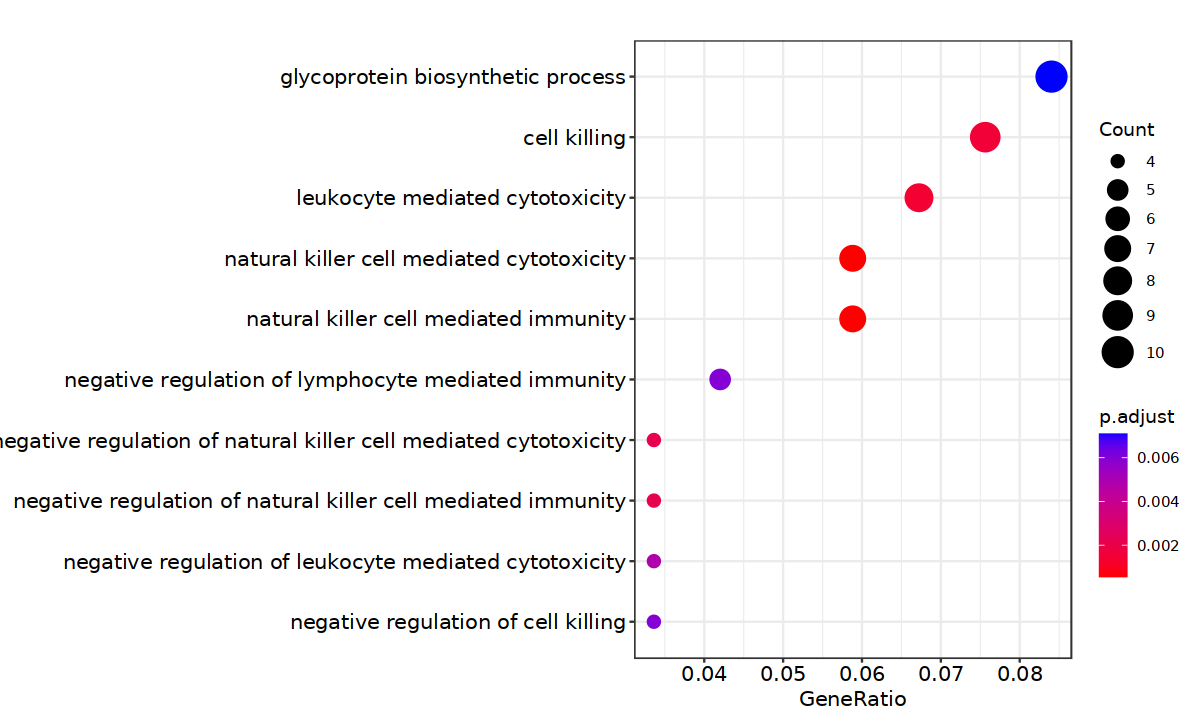

In [30]:
ego_bp_up<-enrichGO(gene       = gene_up,
                 OrgDb      = org.Hs.eg.db,
                 keyType    = 'ENTREZID',
                 ont        = "BP",
                 pAdjustMethod = "BH",
                 pvalueCutoff = 0.05,#0.01
                 qvalueCutoff = 0.05)
options(repr.plot.width = 10,repr.plot.height =6)
dotplot(ego_bp_up,showCategory = 10,label_format=100)

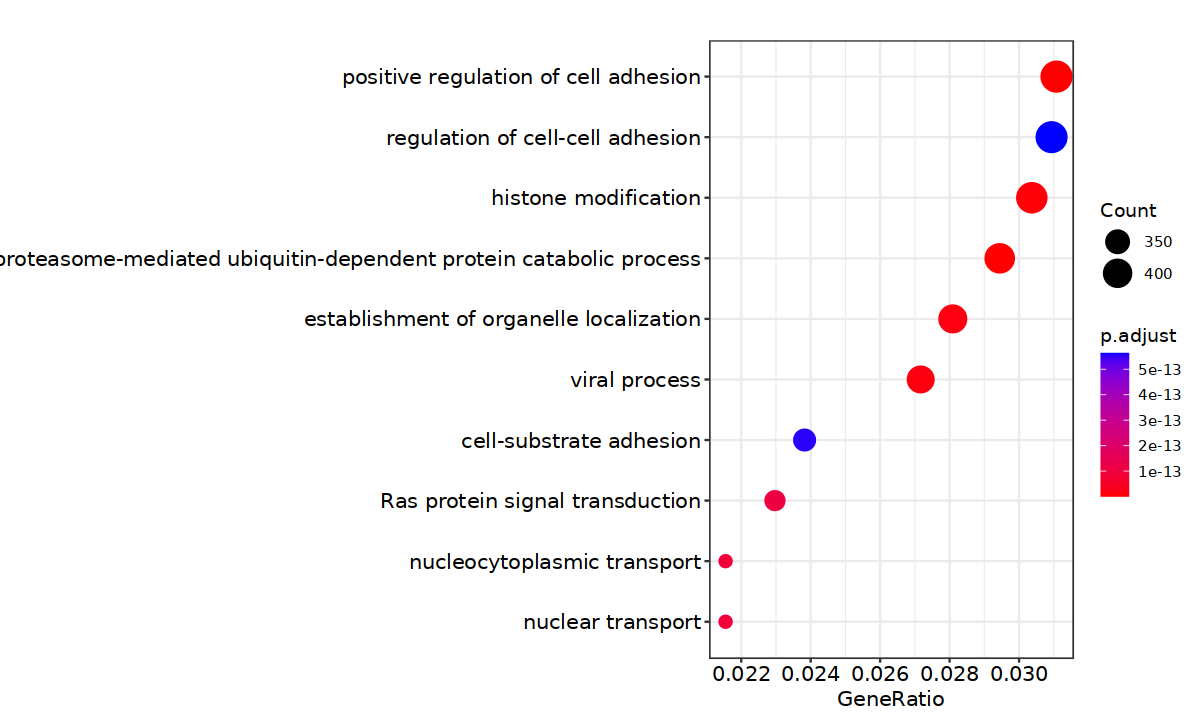

In [31]:
ego_bp_down<-enrichGO(gene       = gene_all,
                 OrgDb      = org.Hs.eg.db,
                 keyType    = 'ENTREZID',
                 ont        = "BP",
                 pAdjustMethod = "BH",
                 pvalueCutoff = 0.05,#0.01
                 qvalueCutoff = 0.5)
options(repr.plot.width = 10,repr.plot.height =6)
dotplot(ego_bp_down,showCategory = 10,label_format=100)

### 两个亚组间模型基因的差异

In [32]:
expr1 = exprSet %>% t() %>%  as.data.frame()

In [33]:
daa1 = cbind(group,expr1) %>% dplyr::select(c('group','FAM200B','BCL2A1','IGJ','TXN'))

In [34]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

Loading required package: cowplot

Warning message:
"package 'cowplot' was built under R version 4.2.3"
Loading required package: tidyverse

Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
v readr     2.1.4     
-- Conflicts ------------------------------------------

In [35]:
mydata<-daa1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",FAM200B:TXN) %>% 
  ##
  dplyr::select(group,gene,Expression) 

In [36]:
compare_means( Expression ~ group, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "group", y = "Expression",
          color = "group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "group", palette = "nejm",
          add = "jitter")

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
FAM200B,Expression,subtype1,subtype2,8.605e-01,1.0e+00,0.86,ns,T-test
BCL2A1,Expression,subtype1,subtype2,3.465e-01,1.0e+00,0.35,ns,T-test
IGJ,Expression,subtype1,subtype2,4.147e-06,1.7e-05,4.1e-06,****,T-test
TXN,Expression,subtype1,subtype2,5.140e-01,1.0e+00,0.51,ns,T-test


In [37]:
diffgene = as.data.frame(compare_means( Expression ~ group, data = mydata, method = 't.test',
              group.by = "gene"))
diffgene = rownames(diffgene) = diffgene[,1]
options(repr.plot.height = 5,repr.plot.width = 21)
options(repr.plot.width = 7,repr.plot.height = 5)

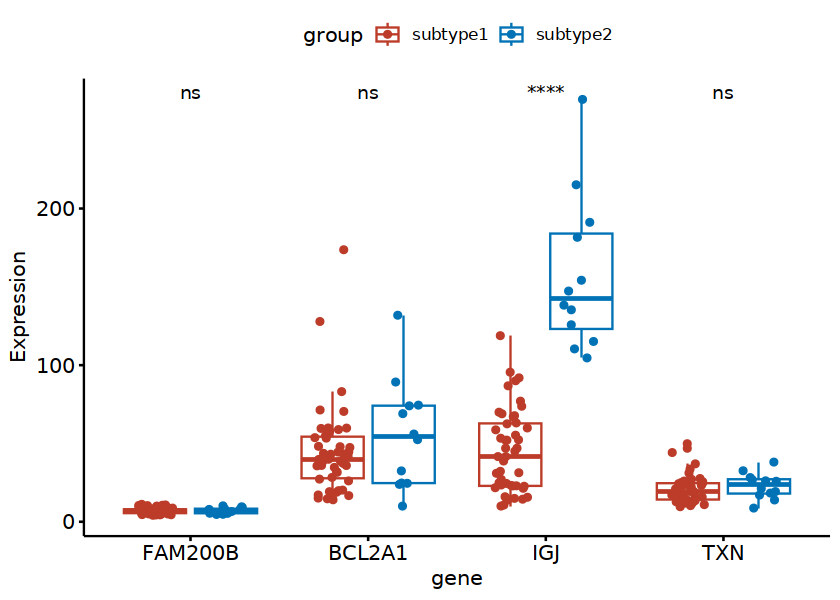

In [38]:
p + stat_compare_means(aes(group = group), label = "p.signif",method = 't.test')

### gsea分析

In [39]:
library(GSEABase)
library(limma) 
library(clusterProfiler)
library(enrichplot)

Warning message:
"package 'GSEABase' was built under R version 4.2.2"
Loading required package: annotate

Warning message:
"package 'annotate' was built under R version 4.2.2"
Loading required package: XML

Loading required package: graph

Warning message:
"package 'graph' was built under R version 4.2.3"

Attaching package: 'graph'


The following object is masked from 'package:XML':

    addNode


The following object is masked from 'package:stringr':

    boundary


Warning message:
"package 'enrichplot' was built under R version 4.2.2"

Attaching package: 'enrichplot'


The following object is masked from 'package:ggpubr':

    color_palette




In [40]:
geneList <- deg$logFC
names(geneList) <- toupper(rownames(deg))
geneList <- sort(geneList,decreasing = T)

In [41]:
geneset <- read.gmt("./kegg.gmt")

gsea_results <- GSEA(
   geneList = geneList,
   TERM2GENE = geneset,
  verbose = F,
  eps=0 )

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.28% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are duplicate gene names, fgsea may produce unexpected results."


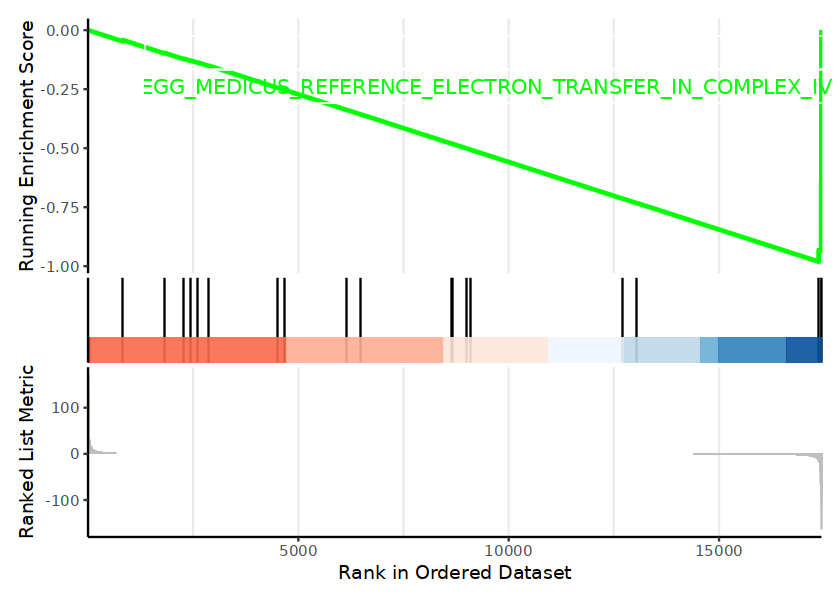

In [42]:
gseaplot2(gsea_results,
          gsea_results@result[["ID"]][1],
         pvalue_table = TRUE)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.28% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are duplicate gene names, fgsea may produce unexpected results."


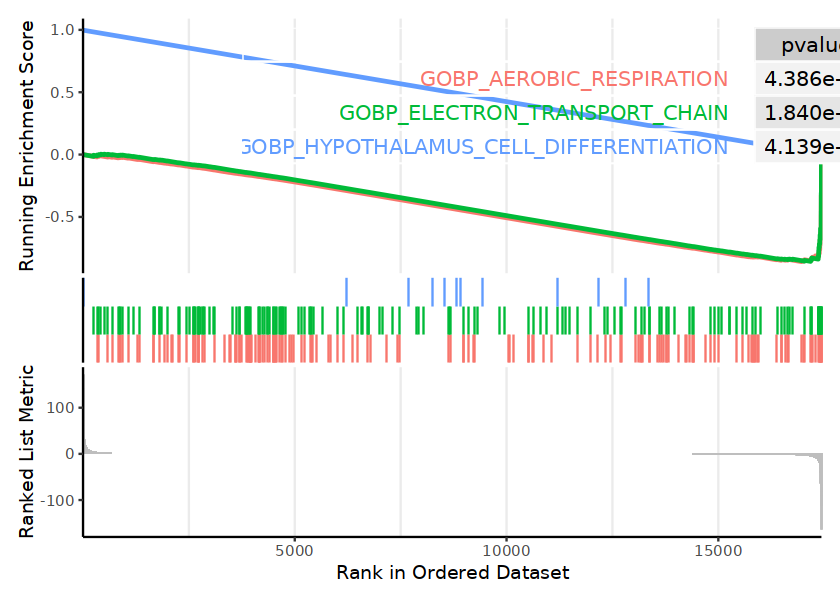

In [43]:
geneset <- read.gmt("./bp.gmt")

gsea_results <- GSEA(
   geneList = geneList,
   TERM2GENE = geneset,
  verbose = F,
  eps=1e-10 )

gseaplot2(gsea_results,
          gsea_results@result[["ID"]][1:3],
         pvalue_table = TRUE)

### 两个亚型的免疫评分差异和免疫检查点差异

In [44]:
ss = expr1 %>% t() %>%  as.data.frame()

In [45]:
save(ss,group,file = 'ss.rda')